In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import sys
import numpy as np
import pandas as pd

import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt

# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use('default') 

print( f"Python {sys.version}" )
print( f"Pandas {pd.__version__}" )
print( f"NumPy {np.__version__}" )
print( f"Matplotlib {mpl.__version__}" ) # ต้อง 3.2 ขึ้น ถึงจะเรียก addfont() ได้

Python 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
Pandas 1.3.4
NumPy 1.20.3
Matplotlib 3.6.1


In [3]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
#เรื่องการ plot ภาษาไทย
import matplotlib as mpl
mpl.rc('font', family='Tahoma')
rcParams['font.size']=10

In [4]:
# Load  employment dataset
# จากข้อมูลในปี 2563 จะมีข้อมูล Q1-Q3 เท่านั้น 
employ_df = pd.read_csv("D:\PYTHON\OS_02_0020_01 (1).csv")
employ_df.info()
display(employ_df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12277 entries, 0 to 12276
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       12277 non-null  int64  
 1   quarter    12277 non-null  object 
 2   region     12277 non-null  object 
 3   area       12277 non-null  object 
 4   sex        12277 non-null  object 
 5   age_group  12277 non-null  object 
 6   value      12277 non-null  float64
 7   unit       12277 non-null  object 
 8   source     12277 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 863.4+ KB


,year,quarter,region,area,sex,age_group,value,unit,source
0,2556,ไตรมาสที่ 1,ทั่วประเทศ,รวม,รวม,รวม,0.7,ร้อยละ,สำนักงานสถิติแห่งชาติ
1,2556,ไตรมาสที่ 3,ภาคใต้,นอกเขตเทศบาล,รวม,รวม,1.1,ร้อยละ,สำนักงานสถิติแห่งชาติ
2,2556,ไตรมาสที่ 2,ภาคใต้,รวม,รวม,15-19 ปี,3.9,ร้อยละ,สำนักงานสถิติแห่งชาติ
3,2556,ไตรมาสที่ 1,ภาคตะวันออกเฉียงเหนือ,รวม,รวม,20-24 ปี,4.0,ร้อยละ,สำนักงานสถิติแห่งชาติ
4,2556,ไตรมาสที่ 4,ภาคเหนือ,รวม,รวม,20-24 ปี,2.7,ร้อยละ,สำนักงานสถิติแห่งชาติ
...,...,...,...,...,...,...,...,...,...
12272,2563,ไตรมาสที่ 3,ภาคเหนือ,ในเขตเทศบาล,หญิง,60 ขึ้นไป,0.3,ร้อยละ,สำนักงานสถิติแห่งชาติ
12273,2563,ไตรมาสที่ 3,ภาคเหนือ,นอกเขตเทศบาล,หญิง,60 ขึ้นไป,0.4,ร้อยละ,สำนักงานสถิติแห่งชาติ
12274,2563,ไตรมาสที่ 3,ภาคใต้,รวม,หญิง,60 ขึ้นไป,0.6,ร้อยละ,สำนักงานสถิติแห่งชาติ
12275,2563,ไตรมาสที่ 3,ภาคใต้,ในเขตเทศบาล,หญิง,60 ขึ้นไป,0.8,ร้อยละ,สำนักงานสถิติแห่งชาติ


In [5]:
# display null values each column
employ_df.isnull().sum()

# ไม่มีค่า null values

year         0
quarter      0
region       0
area         0
sex          0
age_group    0
value        0
unit         0
source       0
dtype: int64

In [6]:
#ดึงข้อมูลเฉพาะ ปี 2562 ที่ age_group ไม่เท่ากับ 'รวม' เรียงตาม (quarter , age_group)
employ_2562 = employ_df[ (employ_df['year'] == 2562)  & (employ_df['age_group'] != 'รวม') ][ ['year','quarter','age_group', 'value','unit'] ].sort_values( ['quarter','age_group'], ascending=[True,False] ).reset_index(drop=True)
employ_2562

,year,quarter,age_group,value,unit
0,2562,ไตรมาสที่ 1,60 ขึ้นไป,0.1,ร้อยละ
1,2562,ไตรมาสที่ 1,60 ขึ้นไป,0.2,ร้อยละ
2,2562,ไตรมาสที่ 1,60 ขึ้นไป,0.1,ร้อยละ
3,2562,ไตรมาสที่ 1,60 ขึ้นไป,0.2,ร้อยละ
4,2562,ไตรมาสที่ 1,60 ขึ้นไป,0.2,ร้อยละ
...,...,...,...,...,...
1370,2562,ไตรมาสที่ 4,15-19 ปี,10.5,ร้อยละ
1371,2562,ไตรมาสที่ 4,15-19 ปี,5.7,ร้อยละ
1372,2562,ไตรมาสที่ 4,15-19 ปี,12.2,ร้อยละ
1373,2562,ไตรมาสที่ 4,15-19 ปี,10.2,ร้อยละ


In [7]:
#ดึงข้อมูลเฉพาะ ปี 2563 ที่ age_group ไม่เท่ากับ 'รวม'  เรียงตาม (quarter , age_group)
employ_2563 = employ_df[ (employ_df['year'] == 2563)  & (employ_df['age_group'] != 'รวม') ][ ['year','quarter','age_group', 'value','unit'] ].sort_values( ['quarter','age_group'], ascending=[True,False]).reset_index(drop=True)
employ_2563

,year,quarter,age_group,value,unit
0,2563,ไตรมาสที่ 1,60 ขึ้นไป,0.1,ร้อยละ
1,2563,ไตรมาสที่ 1,60 ขึ้นไป,0.1,ร้อยละ
2,2563,ไตรมาสที่ 1,60 ขึ้นไป,0.1,ร้อยละ
3,2563,ไตรมาสที่ 1,60 ขึ้นไป,0.2,ร้อยละ
4,2563,ไตรมาสที่ 1,60 ขึ้นไป,0.3,ร้อยละ
...,...,...,...,...,...
1108,2563,ไตรมาสที่ 3,15-19 ปี,4.0,ร้อยละ
1109,2563,ไตรมาสที่ 3,15-19 ปี,17.6,ร้อยละ
1110,2563,ไตรมาสที่ 3,15-19 ปี,12.2,ร้อยละ
1111,2563,ไตรมาสที่ 3,15-19 ปี,16.4,ร้อยละ


In [8]:
# groupby 
my_group62 = ['quarter','age_group']
emp_mean62=employ_2562.groupby(by= my_group62)[['value']].mean()
emp_mean62.columns = ['value_62']
#emp_mean62

# groupby 
my_group63 = ['quarter','age_group']
emp_mean63=employ_2563.groupby(by= my_group62)[['value']].mean()
emp_mean63.columns = ['value_63']
#emp_mean63

In [88]:
# GROUP BY
my_quarter =  ['quarter']   
employ_mean_quarter62_all= employ_2562.groupby(by= my_quarter)[ ['age_group', 'value'] ].mean()
#employ_mean_quarter62 เอาทั้งหมด Q1-Q4

employ_mean_quarter63 = employ_2563.groupby(by= my_quarter)[ ['age_group', 'value'] ].mean()
#employ_mean_quarter63 

concat_emp=pd.concat([employ_mean_quarter62_all, employ_mean_quarter63] , axis=0)
concat_emp


,value
quarter,
ไตรมาสที่ 1,2.075723
ไตรมาสที่ 2,2.161383
ไตรมาสที่ 3,2.230460
ไตรมาสที่ 4,2.105389
ไตรมาสที่ 1,1.895543
ไตรมาสที่ 2,3.454354
ไตรมาสที่ 3,3.520000


In [91]:
concat_emp2 = concat_emp
concat_emp2=concat_emp2.reset_index()
concat_emp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   quarter  7 non-null      object 
 1   value    7 non-null      float64
dtypes: float64(1), object(1)
memory usage: 240.0+ bytes


In [92]:
concat_emp2=concat_emp2.drop(['quarter'], axis=1)

In [93]:
concat_emp2['quarter'] = ['2562 Q1', '2562 Q2', '2562 Q3', '2562 Q4', '2563 Q1', '2563 Q2', '2563 Q3']
concat_emp2

,value,quarter
0,2.075723,2562 Q1
1,2.161383,2562 Q2
2,2.230460,2562 Q3
3,2.105389,2562 Q4
4,1.895543,2563 Q1
5,3.454354,2563 Q2
6,3.520000,2563 Q3


In [94]:
concat_emp2=concat_emp2.set_index('quarter')

            value
quarter          
2562 Q1  2.075723
2562 Q2  2.161383
2562 Q3  2.230460
2562 Q4  2.105389
2563 Q1  1.895543
2563 Q2  3.454354
2563 Q3  3.520000


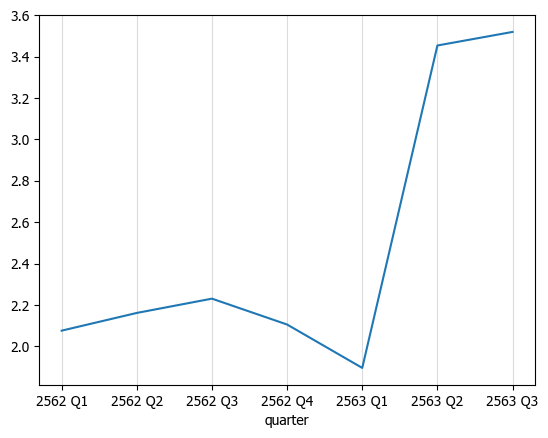

In [95]:
# plot กราฟ แสดงอัตราการว่างงานตั้งแต่ ปี 2562(Q1-Q4) - 2563(Q1-Q3)
lines =pd.to_numeric(concat_emp2['value'] ).plot.line(x='quarter', y='value')
plt.grid(axis='x', alpha=0.45)
print(concat_emp2)

In [10]:
#GROUP BY
#employ_exclude_62Q4 เนื่องจากต้องการเปรียบเทียบข้อมูลใน Q1-Q3
employ_exclude_62Q4 = employ_df[ (employ_df['quarter']!= 'ไตรมาสที่ 4') ][ ['year','quarter','age_group', 'value','unit'] ].sort_values( ['quarter','age_group'], ascending=[True,False] ).reset_index(drop=True)
#หาค่า mean ของแต่ละ quarter เอาเฉพาะ q1 q2 q3
my_quarter =  ['quarter']   
employ_mean_quarter62 = employ_exclude_62Q4.groupby(by= my_quarter)[ ['age_group', 'value'] ].mean()
#employ_mean_quarter62

employ_mean_quarter63 = employ_2563.groupby(by= my_quarter)[ ['age_group', 'value'] ].mean()
#employ_mean_quarter63

quarter
ไตรมาสที่ 1    1.730257
ไตรมาสที่ 2    2.091588
ไตรมาสที่ 3    2.017767
Name: value, dtype: float64

quarter
ไตรมาสที่ 1    1.895543
ไตรมาสที่ 2    3.454354
ไตรมาสที่ 3    3.520000
Name: value, dtype: float64

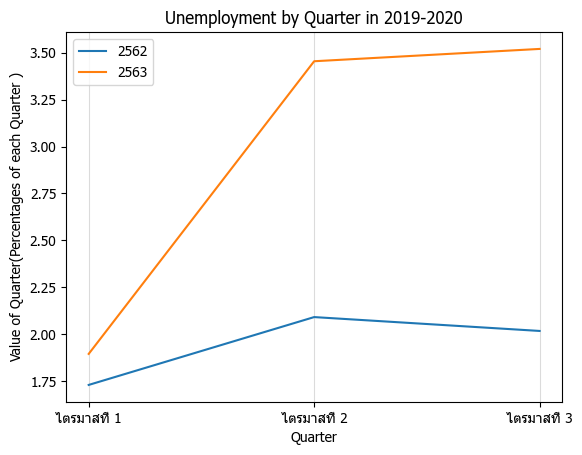

In [11]:
# กราฟแสดงการเปรียบเทียบอัตราการวางงานในปี 2562-2563 (ไตรมาสที่ 1 - ไตรมาสที่ 3)
rcParams['font.size']=10
# create data
quarter62=employ_mean_quarter62.loc[:,'value']
quarter63=employ_mean_quarter63.loc[:,'value']
display(quarter62)
display(quarter63)

# plot lines
plt.plot(quarter62, label = "2562")
plt.plot(quarter63, label = "2563")
plt.title("Unemployment by Quarter in 2019-2020")
plt.xlabel("Quarter")
plt.ylabel("Value of Quarter(Percentages of each Quarter )")
plt.grid(axis='x', alpha=0.45)
plt.legend()
plt.show()


            value
quarter          
2562 Q1  2.075723
2562 Q2  2.161383
2562 Q3  2.230460
2562 Q4  2.105389
2563 Q1  1.895543
2563 Q2  3.454354
2563 Q3  3.520000


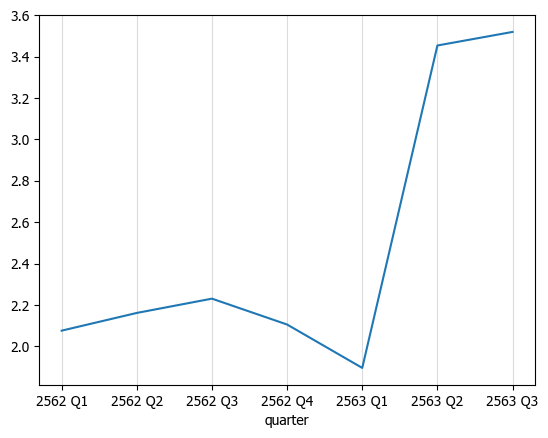

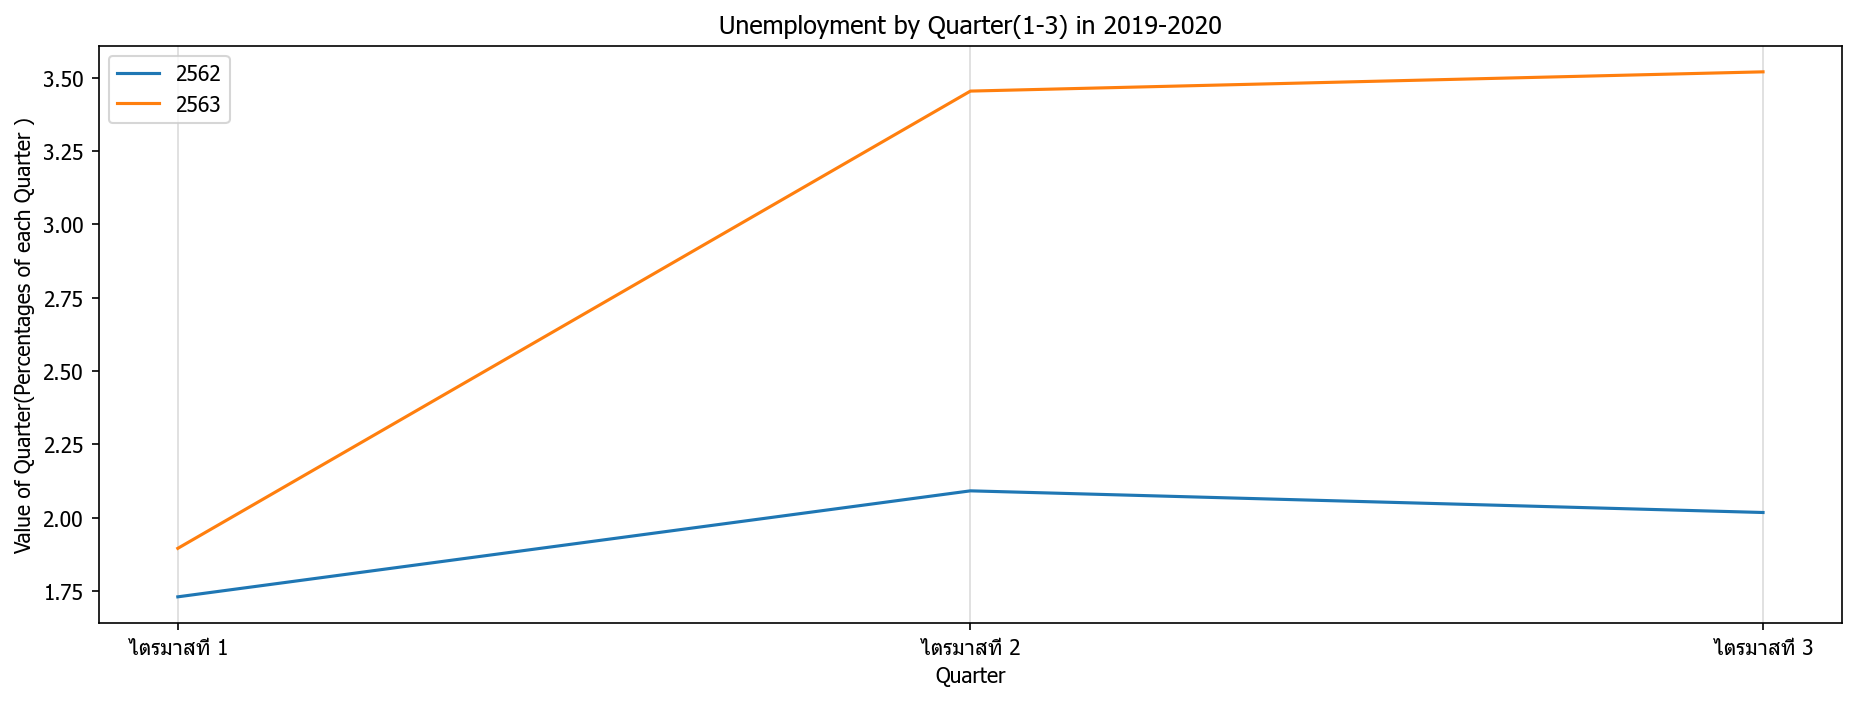

In [100]:
#plot concat_emp ตั้งแต่ปี 2562-2563 
rcParams['font.size']=10
lines =pd.to_numeric(concat_emp2['value'] ).plot.line(x='quarter', y='value')
plt.grid(axis='x', alpha=0.45)
print(concat_emp2)


#plot graph
# create data
rcParams['font.size']=10
quarter62=employ_mean_quarter62.loc[:,'value']
quarter63=employ_mean_quarter63.loc[:,'value']  
# plot lines
fig = plt.figure(figsize=(15,5), dpi=150)
plt.plot(quarter62, label = "2562")
plt.plot(quarter63, label = "2563")
plt.title("Unemployment by Quarter(1-3) in 2019-2020")
plt.xlabel("Quarter")
plt.ylabel("Value of Quarter(Percentages of each Quarter )")
plt.grid(axis='x', alpha=0.45)
plt.legend()
plt.show()



In [13]:
#concat emp62 และ emp63 #'quarter 1','quarter 2','quarter 3','quarter 4'
emp_concat=pd.concat([emp_mean62, emp_mean63] , axis=1)
#emp_concat.info()
emp_concat.columns = ['value_62','value_63']
emp_concat

#มีข้อมูลเป็น NaN เนื่องจากในปี 2563 ไม่มีข้อมูลไตรมาสที่ 4

value_62   value_63
quarter     age_group                     
ไตรมาสที่ 1 15-19 ปี   6.976596   5.211111
            20-24 ปี   4.562500   5.052083
            25-29 ปี   1.806250   2.093750
            30-34 ปี   0.719565   0.737500
            35-39 ปี   0.564444   0.634043
            40-49 ปี   0.232558   0.400000
            50-59 ปี   0.250000   0.295556
            60 ขึ้นไป  0.212903   0.183871
ไตรมาสที่ 2 15-19 ปี   7.359574  10.229167
            20-24 ปี   5.258333   8.520833
            25-29 ปี   1.504167   3.472917
            30-34 ปี   0.612500   1.675000
            35-39 ปี   0.480435   1.275000
            40-49 ปี   0.297778   0.981250
            50-59 ปี   0.217647   0.793750
            60 ขึ้นไป  0.232258   0.365116
ไตรมาสที่ 3 15-19 ปี   6.339583  10.160417
            20-24 ปี   6.010417   8.466667
            25-29 ปี   1.706250   3.760417
            30-34 ปี   0.975000   2.056250
            35-39 ปี   0.613333   1.352083
            40-49 ปี   0.287234   0.808333
            50-59 ปี   0.224390   0.633333
            60 ขึ้นไป  0.191304   0.323077
ไตรมาสที่ 4 15-19 ปี   6.541667        NaN
            20-24 ปี   4.718750        NaN
            25-29 ปี   1.556250        NaN
            30-34 ปี   0.721739        NaN
            35-39 ปี   0.558696        NaN
            40-49 ปี   0.380435        NaN
            50-59 ปี   0.230556        NaN
            60 ขึ้นไป  0.206250        NaN

In [14]:
df1_transposed=emp_mean63.T
df1_transposed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, value_63 to value_63
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   (ไตรมาสที่ 1, 15-19 ปี)   1 non-null      float64
 1   (ไตรมาสที่ 1, 20-24 ปี)   1 non-null      float64
 2   (ไตรมาสที่ 1, 25-29 ปี)   1 non-null      float64
 3   (ไตรมาสที่ 1, 30-34 ปี)   1 non-null      float64
 4   (ไตรมาสที่ 1, 35-39 ปี)   1 non-null      float64
 5   (ไตรมาสที่ 1, 40-49 ปี)   1 non-null      float64
 6   (ไตรมาสที่ 1, 50-59 ปี)   1 non-null      float64
 7   (ไตรมาสที่ 1, 60 ขึ้นไป)  1 non-null      float64
 8   (ไตรมาสที่ 2, 15-19 ปี)   1 non-null      float64
 9   (ไตรมาสที่ 2, 20-24 ปี)   1 non-null      float64
 10  (ไตรมาสที่ 2, 25-29 ปี)   1 non-null      float64
 11  (ไตรมาสที่ 2, 30-34 ปี)   1 non-null      float64
 12  (ไตรมาสที่ 2, 35-39 ปี)   1 non-null      float64
 13  (ไตรมาสที่ 2, 40-49 ปี)   1 non-null      float64
 14  (ไตรม

In [15]:
#หาค่า mean ของแต่ละช่วงปี 2563
mean_arg_15_19 = employ_2563[ (employ_2563['age_group'] == '15-19 ปี')][ ['value'] ].mean()
mean_arg_20_24 = employ_2563[ (employ_2563['age_group'] == '20-24 ปี')][ ['value'] ].mean()
mean_arg_25_29 = employ_2563[ (employ_2563['age_group'] == '25-29 ปี')][ ['value'] ].mean()
mean_arg_30_34 = employ_2563[ (employ_2563['age_group'] == '30-34 ปี')][ ['value'] ].mean()
mean_arg_35_39 = employ_2563[ (employ_2563['age_group'] == '35-39 ปี')][ ['value'] ].mean()
mean_arg_40_49 = employ_2563[ (employ_2563['age_group'] == '40-49 ปี')][ ['value'] ].mean()
mean_arg_50_59 = employ_2563[ (employ_2563['age_group'] == '50-59 ปี')][ ['value'] ].mean()
mean_arg_60_up = employ_2563[ (employ_2563['age_group'] == '60 ขึ้นไป')][ ['value'] ].mean()

print(mean_arg_15_19,mean_arg_20_24,mean_arg_25_29,mean_arg_30_34,mean_arg_35_39,mean_arg_40_49,mean_arg_50_59,mean_arg_60_up)


value    8.604255
dtype: float64 value    7.346528
dtype: float64 value    3.109028
dtype: float64 value    1.489583
dtype: float64 value    1.09021
dtype: float64 value    0.732168
dtype: float64 value    0.580142
dtype: float64 value    0.300885
dtype: float64


In [16]:
#แทนที่ NaN ด้วยค่าเฉลี่ย ของช่วงปีนั้นๆ
df1_transposed['ไตรมาสที่ 4','15-19 ปี'] =8.604255
df1_transposed['ไตรมาสที่ 4','20-24 ปี'] =7.346528
df1_transposed['ไตรมาสที่ 4','25-29 ปี'] =3.109028
df1_transposed['ไตรมาสที่ 4','30-34 ปี'] =1.489583
df1_transposed['ไตรมาสที่ 4','35-39 ปี'] =1.09021
df1_transposed['ไตรมาสที่ 4','40-49 ปี'] =0.732168
df1_transposed['ไตรมาสที่ 4','50-59 ปี'] =0.580142
df1_transposed['ไตรมาสที่ 4','60 ขึ้นไป'] =0.300885
#df1_transposed
emp_mean63_add_value =df1_transposed.T
emp_mean63_add_value


value_63
quarter     age_group           
ไตรมาสที่ 1 15-19 ปี    5.211111
            20-24 ปี    5.052083
            25-29 ปี    2.093750
            30-34 ปี    0.737500
            35-39 ปี    0.634043
            40-49 ปี    0.400000
            50-59 ปี    0.295556
            60 ขึ้นไป   0.183871
ไตรมาสที่ 2 15-19 ปี   10.229167
            20-24 ปี    8.520833
            25-29 ปี    3.472917
            30-34 ปี    1.675000
            35-39 ปี    1.275000
            40-49 ปี    0.981250
            50-59 ปี    0.793750
            60 ขึ้นไป   0.365116
ไตรมาสที่ 3 15-19 ปี   10.160417
            20-24 ปี    8.466667
            25-29 ปี    3.760417
            30-34 ปี    2.056250
            35-39 ปี    1.352083
            40-49 ปี    0.808333
            50-59 ปี    0.633333
            60 ขึ้นไป   0.323077
ไตรมาสที่ 4 15-19 ปี    8.604255
            20-24 ปี    7.346528
            25-29 ปี    3.109028
            30-34 ปี    1.489583
            35-39 ปี    1.090210
            40-49 ปี    0.732168
            50-59 ปี    0.580142
            60 ขึ้นไป   0.300885

In [17]:
#concat emp62 และ emp63 #'quarter 1','quarter 2','quarter 3','quarter 4'
emp_concat=pd.concat([emp_mean62, emp_mean63_add_value] , axis=1)
#emp_concat.info()
emp_concat.columns = ['value_62','value_63']
display(emp_concat)

#หาข้อมูลที่อัตราการว่างงาน 2562 มากกว่า 2563
emp_concat_q = emp_concat.query('value_62 > value_63')
display(emp_concat_q)

value_62   value_63
quarter     age_group                     
ไตรมาสที่ 1 15-19 ปี   6.976596   5.211111
            20-24 ปี   4.562500   5.052083
            25-29 ปี   1.806250   2.093750
            30-34 ปี   0.719565   0.737500
            35-39 ปี   0.564444   0.634043
            40-49 ปี   0.232558   0.400000
            50-59 ปี   0.250000   0.295556
            60 ขึ้นไป  0.212903   0.183871
ไตรมาสที่ 2 15-19 ปี   7.359574  10.229167
            20-24 ปี   5.258333   8.520833
            25-29 ปี   1.504167   3.472917
            30-34 ปี   0.612500   1.675000
            35-39 ปี   0.480435   1.275000
            40-49 ปี   0.297778   0.981250
            50-59 ปี   0.217647   0.793750
            60 ขึ้นไป  0.232258   0.365116
ไตรมาสที่ 3 15-19 ปี   6.339583  10.160417
            20-24 ปี   6.010417   8.466667
            25-29 ปี   1.706250   3.760417
            30-34 ปี   0.975000   2.056250
            35-39 ปี   0.613333   1.352083
            40-49 ปี   0.287234   0.808333
            50-59 ปี   0.224390   0.633333
            60 ขึ้นไป  0.191304   0.323077
ไตรมาสที่ 4 15-19 ปี   6.541667   8.604255
            20-24 ปี   4.718750   7.346528
            25-29 ปี   1.556250   3.109028
            30-34 ปี   0.721739   1.489583
            35-39 ปี   0.558696   1.090210
            40-49 ปี   0.380435   0.732168
            50-59 ปี   0.230556   0.580142
            60 ขึ้นไป  0.206250   0.300885

value_62  value_63
quarter     age_group                    
ไตรมาสที่ 1 15-19 ปี   6.976596  5.211111
            60 ขึ้นไป  0.212903  0.183871

In [18]:
#แผนภูมิแสดงอัตราการว่างงานของแต่ละช่วงอายุตามไตรมาสที่ 1 -ไตรมาสที่ 4
# plot bar
rcParams['font.size']=100
emp_concat=pd.concat([emp_mean62, emp_mean63_add_value] , axis=1)
emp_concat.columns = ['value_62','value_63']

df = pd.DataFrame( {'value_62':emp_concat['value_62'], 'value_63':emp_concat['value_63']} )
#df = df.set_index('value_62')
display(emp_concat)

fig = plt.figure(figsize=(100,50), dpi=150)
ax=plt.axes()
ax.set_facecolor('#F2F1F0')
df.plot.bar(ax=ax, grid=True, edgecolor="white",zorder=2) # This equals df.plot(kind='bar', ax=plt.axes())
plt.title("Unemployment by age in 2019-2020")
plt.xlabel("Age Group of Quarter ")
plt.ylabel("Value(Percentages of each age group)")
plt.show()

value_62   value_63
quarter     age_group                     
ไตรมาสที่ 1 15-19 ปี   6.976596   5.211111
            20-24 ปี   4.562500   5.052083
            25-29 ปี   1.806250   2.093750
            30-34 ปี   0.719565   0.737500
            35-39 ปี   0.564444   0.634043
            40-49 ปี   0.232558   0.400000
            50-59 ปี   0.250000   0.295556
            60 ขึ้นไป  0.212903   0.183871
ไตรมาสที่ 2 15-19 ปี   7.359574  10.229167
            20-24 ปี   5.258333   8.520833
            25-29 ปี   1.504167   3.472917
            30-34 ปี   0.612500   1.675000
            35-39 ปี   0.480435   1.275000
            40-49 ปี   0.297778   0.981250
            50-59 ปี   0.217647   0.793750
            60 ขึ้นไป  0.232258   0.365116
ไตรมาสที่ 3 15-19 ปี   6.339583  10.160417
            20-24 ปี   6.010417   8.466667
            25-29 ปี   1.706250   3.760417
            30-34 ปี   0.975000   2.056250
            35-39 ปี   0.613333   1.352083
            40-49 ปี   0.287234   0.808333
            50-59 ปี   0.224390   0.633333
            60 ขึ้นไป  0.191304   0.323077
ไตรมาสที่ 4 15-19 ปี   6.541667   8.604255
            20-24 ปี   4.718750   7.346528
            25-29 ปี   1.556250   3.109028
            30-34 ปี   0.721739   1.489583
            35-39 ปี   0.558696   1.090210
            40-49 ปี   0.380435   0.732168
            50-59 ปี   0.230556   0.580142
            60 ขึ้นไป  0.206250   0.300885

            value
quarter          
2562 Q1  2.075723
2562 Q2  2.161383
2562 Q3  2.230460
2562 Q4  2.105389
2563 Q1  1.895543
2563 Q2  3.454354
2563 Q3  3.520000


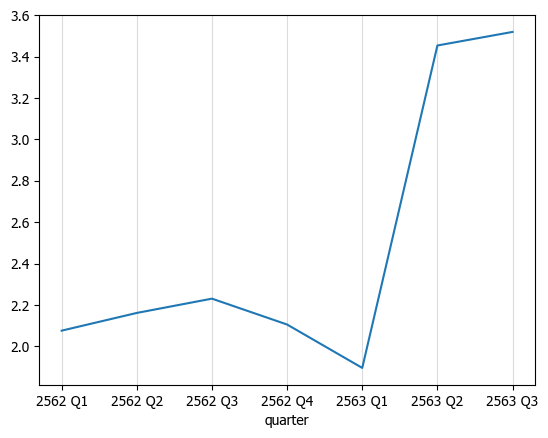

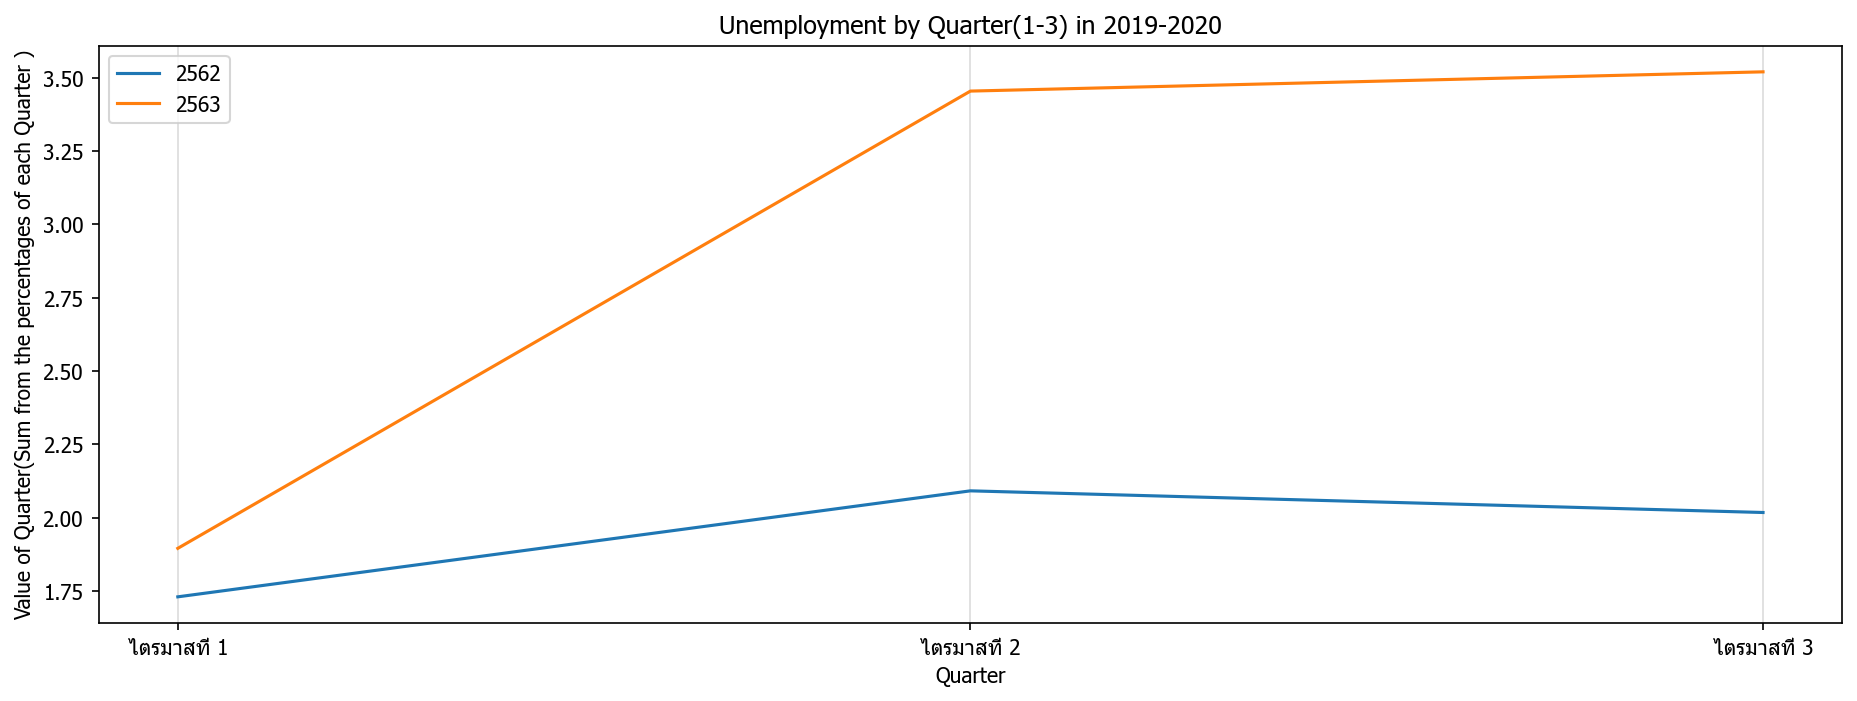

In [98]:
#plot concat_emp ตั้งแต่ปี 2562-2563 
rcParams['font.size']=10
lines =pd.to_numeric(concat_emp2['value'] ).plot.line(x='quarter', y='value')
plt.grid(axis='x', alpha=0.45)
print(concat_emp2)

#plot graph
# create data
rcParams['font.size']=10
quarter62=employ_mean_quarter62.loc[:,'value']
quarter63=employ_mean_quarter63.loc[:,'value']  
# plot lines
fig = plt.figure(figsize=(15,5), dpi=150)
plt.plot(quarter62, label = "2562")
plt.plot(quarter63, label = "2563")
plt.title("Unemployment by Quarter(1-3) in 2019-2020")
plt.xlabel("Quarter")
plt.ylabel("Value of Quarter(Sum from the percentages of each Quarter )")
plt.grid(axis='x', alpha=0.45)
plt.legend()
plt.show()

#plot bar
rcParams['font.size']=85
emp_concat=pd.concat([emp_mean62, emp_mean63_add_value] , axis=1)
emp_concat.columns = ['value_62','value_63']

df = pd.DataFrame( {'value_62':emp_concat['value_62'], 'value_63':emp_concat['value_63']} )
#df = df.set_index('value_62')
#display(emp_concat)

fig = plt.figure(figsize=(100,50), dpi=150)
ax=plt.axes()
ax.set_facecolor('#F2F1F0')
df.plot.bar(ax=ax, grid=True, edgecolor="white",zorder=2) # This equals df.plot(kind='bar', ax=plt.axes())
plt.title("Unemployment by age in 2019-2020")
plt.xlabel("Age Group of Quarter ")
plt.ylabel("Value(Percentages of each age group)")
plt.show()

# สรุป จากข้อมูลที่ได้อนุมานได้ว่าว่าโควิด - 19 มีผลต่ออัตราการว่างงานของคนไทยในช่วง ปี 2563 โดยช่วงที่มีการว่างงานมากที่สุดจะอยู่ในช่วง ไตรมาสที่ 2 - ไตรมาสที่ 3 ที่ช่วงอายุระหว่าง 19 - 29 ปี  